# Project 3 - Mayfly Model

#### Nicholas Colan -- UB: 5014 2568

# Introduction

The size and makeup of a population of species in a certain geographical area changes over time as individuals of that species are born/introduced to the population, and as individual members of that species die or emigrate elsewhere. Over time, the size of a population will grow and shrink in response to changes in that population's  environment. The makeup of that population ( in terms of gender, age, etc.) can also change with shifts in the environment as well as occurences of different environmental events.

Our goal in this project report is to try to study and predict changes in the population of mayflys using mathematical modeling. First we will look at the changes in a populations size using the **exponential growth model**, which will show how the size of the population will grow when there is an unlimited amount of natural resources present in the species' environment.

After this, we will improve our growth model to more accurately reflect real world conditions -- where there is only a finite amount of natural resources available to the mayfly population. This will cause the size of the population to dynamically change over time.

In this project we will assume that the that the size of population of mayflies in a given year depends only on the size of population in the previous year. If $x_n$ denotes the size of population in year $n$ then we can write:

$x_n = g(x_{n-1})\cdot x_{n-1}$ -- $(1)$

, where $g(x_{n-1})$ is the growth rate of the population. This model of the population size will heavily depend on what equation $g(x)$ represents.

# Base Case -- Exponential Growth

Thomas Malthus was a $18th$ century clergyman who studied political demographics. He greatly influenced Charles Darwin and his work on his theory of natural selection. Malthus' book, "*An Essay on the Principle of Population*",  stated that populations with unlimited natural resources will grow rapidly and indefinitely. He went on to state that once the amount of available natural resources was exceeded by the needs of the population, the growth of the population decreases rapidly.

This case of population growth with unlimited resources is called **exponential growth**. In order to study and observe exponential growth we need to first create a mathematical model to represent this situation. Using equation $(1)$:

$x_n = g(x_{n-1})\cdot x_{n-1}\$

We can assume here since there is an unlimited amount of resources, Malthus' theory states that the growth of the population will be constant. Because $g(x)$ will be constant, we can assign it to a variable, $a$. Substituting $a$ for $g(x)$ results in:

$x_n = a\cdot x_{n-1}$ -- $(2)$

Here we can see that the size of the population is directly affected by $a$, and can say that the population in year $n$ ($x_n$) will be equal to the previous years population ($x_{n-1}$) multiplied by the growth factor $a$. For example, if $a = 4$, the population will grow by four times every year. Using induction, we can arrive to a final equation for exponential growth:

$x_n = a^{n}\cdot x_0$ -- $(3)$

Below we will illustrate an example of exponential growth and decay. The x-values in this graph will represent each successive year, while the y-values will represent the size of the population. The y-values are calculated using equation $(3)$ with different values for $a$.

In [1]:
# First case: a > 1
# Let x-axis = number of years
# Let y-axis = number of mayflys

a_1 = 2
a_2 = -2
x_n = 1 # Start with population of 1 mayfly
numYears = 10

xList = [x for x in range(numYears)] # First 10 data points on x-axis representing 10 years of mayfly population
yList1 = [2]                      # yList starts with year 1 population = 1 mayfly
for y in range(len(xList)-1):
    yList1.append((a_1)*yList1[-1])
    
yList2 = [2]
for y in range(len(xList)-1):
    yList2.append(abs((a_2)*yList2[-1])*-1)

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # Used to sharpen graph image
%matplotlib notebook

<IPython.core.display.Javascript object>


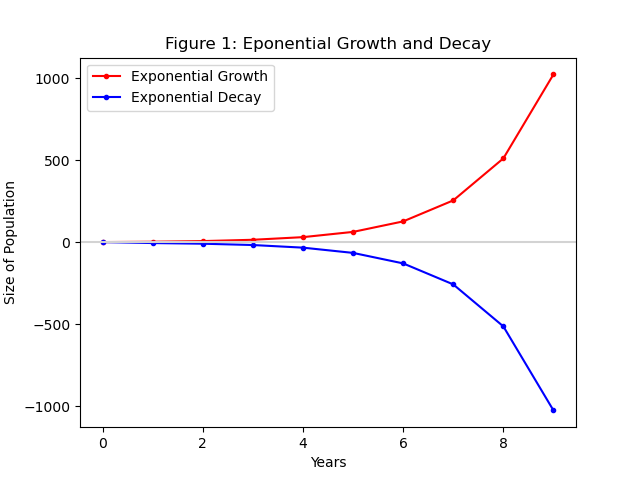

In [3]:
plt.figure()
plt.plot(xList,yList1,'r.-',label="Exponential Growth")
plt.plot(xList,yList2,'b.-',label="Exponential Decay")
plt.title("Figure 1: Eponential Growth and Decay")
plt.xlabel("Years")
plt.ylabel("Size of Population")
plt.axhline(0, color='lightgrey',)
plt.legend()

Figure 1 illustrates exponential growth and decay of a population with a growth rate of $a = 2$ and $a = -2$. We can see what a population would look like after $10$ years if it was allowed to double in size ($a = 2$) each year without suffering any loss of individuals (due to predation, disease, natural events, etc.). After 10 years the population increases from $2$ to $1024$ individuals. If nothing changed in the environment the population would continue to grow to infinity, which is not something that we see in real world conditions. 

# Mayfly Model -- Linear Growth Rate

In order to more accurately predict how a population of mayflys will grow over time in real world conditions, we must adjust equation $(3)$ to account for real world factors with limited resources. Once the population of mayflys starts to become larger and larger, there will be an increase in competition for the limited resources in the mayflys' environment. With an increasing population, each individual mayfly will have less and less access to resources needed to survive and reproduce -- causing the population growth to slow down over time. To accurately model this we need to make our growth function, $g(x)$, represent decreasing growth rate over time.

There are only a certain amount of resources available to populations of species in the real world, and because of this we can assume that the mayflys' environment will only be able to support a maximum population size of $M$ before the growth rate becomes $0$. With this condition we can set $g(M) = 0$. 

This allows use to create the equation describing growth rate with an increasing population living in an evironment with limited resources:

$g(x) = a(M-x)$ , $a > 0$ -- $(4)$

Figure $2$ below illustrates equation $(4)$, the growth rate per year of a population living in real world conditions.

In [4]:
M = 20 # Max size of population
a = 1.5 # Growth rate value

xList = [i for i in range(M+1)]

yList = [M]
for i in range(len(xList)):
    yList.append(a*(M-i))
del(yList[0])

<IPython.core.display.Javascript object>


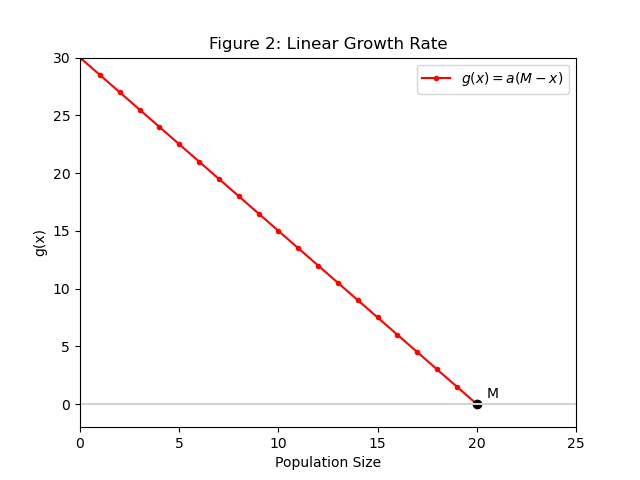

In [5]:
plt.figure()
plt.plot(xList,yList,'r.-',label="$g(x) = a(M-x)$")
plt.plot(M,0,'ko')
plt.axhline(0, color='lightgrey',)
plt.xlim(0,25)
plt.ylim(-2,30)
plt.xlabel("Population Size")
plt.ylabel("g(x)")
plt.title("Figure 2: Linear Growth Rate")
plt.annotate("M",(M,0),xytext=(M+0.5,0.5)) # Label the point (0, M)
plt.legend()

If we substitute the new linear growth equation, $(4)$, into equation $(1)$, the new equation will become:

$x_n = a(M - x_{n-1})\cdot x_{n-1}$ -- $(5)$

The two parameters in equation $(5), M$ and $a$, can be reduced into a single parameter, $y_n$. Define $y_n$ as:

$y_n = \left(\frac{x_n}{M} \right)$

Eq $(5)$ now becomes:

$My_n = a(M - My_{n-1})My_{n-1}$

If we let $b = aM$ and simplify we get:

$y_n = b(1 - y_{n-1})y_{n-1}, b \geq 0$ -- $(6)$

Equation $(6)$ will accurately describe a population of mayflys living in real world environments. Equation $(6)$ is the **mayfly model** that will be used to analyze mayfly populations with different initial conditions. We will first define the function `mayfly()` that will generate a list of y-values derived using Equation $(6)$.

In [6]:
def mayfly(y0,b,N):
    ylist = [y0]
    for n in range(N):
        y_old = ylist[-1]
        y_new = b*(1-y_old)*y_old
        ylist.append(y_new)
    return ylist

In [7]:
from matplotlib.widgets import Slider # import the Slider widget to adjust y0 and b
import matplotlib.pyplot as plt
import numpy as np

In the mayfly model, meaningful values of $y_n$ lie between $0$ and $1$, so we must only look at the plot when the $y$ variable is: $0 < y < 1$. On top of that, the mayfly model may break if the value of $b$ exceeds $4$, so we must set the value of $b$: $0 \leq b \leq 4$. The time interval ($N$) is set to $20$ years. 

In [8]:
y0_min = 0.01 # Min value the y0 slider can be set to
y0_max = 0.99 # Max value the y0 slider can be set to
y0_init = 0.2 # Value of y0 to be used when graph is initially created

b_min = 0 # Min value the b slider can be set to
b_max = 4 # Max value the b slider can be set to
b_init = 1.25 # Value of b to be used when graph is initially created

N = 20 # Number of years 

With initial conditions set, we now will create a plot illustrating the population growth of the mayflys over the time interval $N$.

<IPython.core.display.Javascript object>


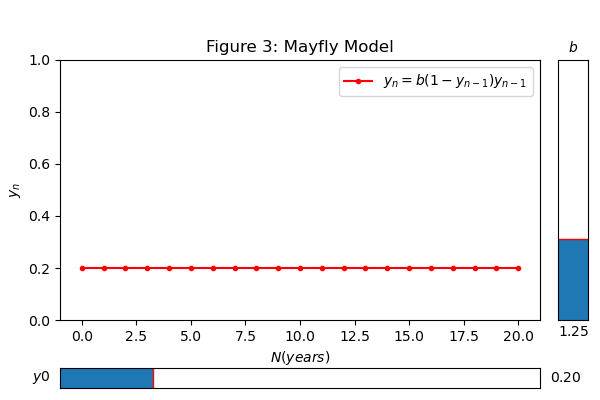

In [9]:
yList = mayfly(y0_init,b_init,N) # Y-values of mayfly population with initial conditions

fig = plt.figure(figsize=(6,4)) # Set size of the figure

# Need to create layout of graph containing 3 axes objects: 
mayfly_ax = plt.axes([0.1, 0.2, 0.8, 0.65]) # Axes for plot of equation (6)
y0_slider_ax = plt.axes([0.1, 0.03, 0.8, 0.05]) # Axes for slider that adjusts y0 value
b_slider_ax = plt.axes([0.93, .2, 0.05, 0.65]) # Axes for slider that adjusts b value

plt.axes(mayfly_ax)
plt.title("Figure 3: Mayfly Model")
mayfly_plot, = plt.plot(yList,'r.-',label="$y_n = b(1 - y_{n-1})y_{n-1}$")
plt.ylim(0,1)
plt.xlabel("$N (years)$")
plt.ylabel("$y_n$")

# Creating sliders for y0 and b variables
y0_slider = Slider(y0_slider_ax,      # the axes object containing the slider
                  '$y0$',            # the name of the slider parameter
                  y0_min,          # minimal value of the parameter
                  y0_max,          # maximal value of the parameter
                  valinit=y0_init  # initial value of the parameter
                 )
b_slider =  Slider(b_slider_ax,      # the axes object containing the slider
                  '$b$',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init,  # initial value of the parameter
                  orientation='vertical'
                 )

# To allow for dynamic changes in the graph, we must define a function that will be called 
# to update the y-values of the graph each time the value of a slider changes & redraw the plot
def update(a):
    mayfly_plot.set_ydata(mayfly(y0_slider.val,b_slider.val,N))
    fig.canvas.draw_idle()
    
# To update the graph when slider values are changed, call the 'update' function each time 
y0_slider.on_changed(update) 
b_slider.on_changed(update)

plt.legend()
plt.show()

# Analysis of Mayfly Model

Using the interactive graph above, we are able to observe the tendencies of a population of mayflys under different initial sizes and different growth rates. It is clear that changes in the starting size and growth rate of a population can have very pronounced effects on the growth of the population over a number of years.

If we use starting conditions of $y_0 = 0.2$ and $b = 1.25$, the mayfly population will stay at the same size over the entire time interval. If we keep the growth rate $b = 1.25$ fixed and adjust the starting mayfly population size to be larger than $y_n = 0.2$, we can see that the mayfly population will gradually decay back down to $y = 0.2$ over time. Keeping that same growth rate of $b = 1.25$ and adjusting the starting population to be smaller than $y_n = 0.2$, we can see that the mayfly population will gradually grow back up to $y = 0.2$ over time. This shows that the mayfly population grows at the just the right amount each year to be in perfect equilibrium with the amount of resources needed to maintain its population.

With a growth rate $2.50 \leq b \leq 3.00$, the population of mayflys will grow at too fast of a rate year by year to be able to achieve equilibrium with their surrounding environment until many years pass ($N > 20$). At this growth rate and with $y_0 < 0.6$, we see a huge increase in the population of mayflys in year $1$. After year $1$ the mayfly population will oscillate between decreasing values of growth and decay every year until they reach equilibrium with their environment over time. With a $y_0 > 0.6$ and $2.50 \leq b \leq 3.00$, the mayfly population will see a large decrease in year $1$ and then oscillation between decreasing values of decay and growth every year until they reach equilibrium with their environment.

An interesting finding from the mayfly model was the occurence of certain edge cases with $y_0 = 0.10, 0.29, 0.70$ and a constant value of $b = 3.40$. The mayfly population would rapidly grow or decay until year 2 where it then achieved a relatively stable population size year-to-year until around $N = 8$, which would then begin to increasingly grow or decay every year by a larger and larger amount. 

It was clear that the mayfly model started to become erratic for all $y_0$ values once $b = 4.00$. The mayfly population would seem to grow or decay at random & large amounts year by year. This illustrates that too large of a growth rate of the mayflys caused a high amounts of instability in the populations due for high competition for resources. An interesting case was when $y_0 = 0.25$ and $b = 4.00$. For these conditions, the mayflys would grow to their maximum size at $N = 7$, and then completely die out within a year ($N = 8$).

Lastly, it was apparent that no matter what the initial conditions for the mayfly model were, over time their population's growth and decay occurred in a cyclical-like manner. This can be more clearly seen once we increase the time frame for the mayfly model, below this is illustraed in Figure $4$ where $N = 100$:

<IPython.core.display.Javascript object>


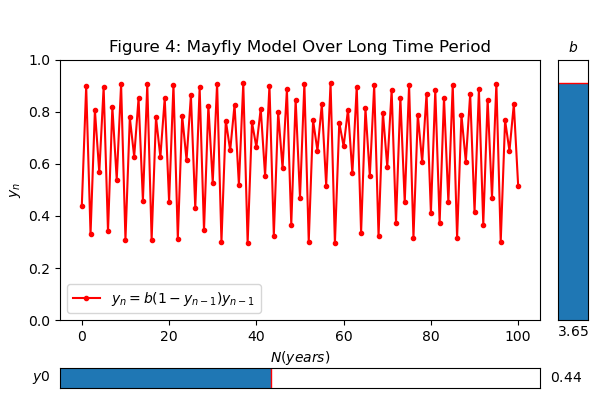

In [10]:
y0_min = 0.01 # Min value the y0 slider can be set to
y0_max = 0.99 # Max value the y0 slider can be set to
y0_init = 0.44 # Value of y0 to be used when graph is initially created

b_min = 0 # Min value the b slider can be set to
b_max = 4 # Max value the b slider can be set to
b_init = 3.65 # Value of b to be used when graph is initially created

N = 100 # Number of years 

yList = mayfly(y0_init,b_init,N) # Y-values of mayfly population with initial conditions

fig = plt.figure(figsize=(6,4)) # Set size of the figure

# Need to create layout of graph containing 3 axes objects: 
mayfly_ax = plt.axes([0.1, 0.2, 0.8, 0.65]) # Axes for plot of equation (6)
y0_slider_ax = plt.axes([0.1, 0.03, 0.8, 0.05]) # Axes for slider that adjusts y0 value
b_slider_ax = plt.axes([0.93, .2, 0.05, 0.65]) # Axes for slider that adjusts b value

plt.axes(mayfly_ax)
plt.title("Figure 4: Mayfly Model Over Long Time Period")
mayfly_plot, = plt.plot(yList,'r.-',label="$y_n = b(1 - y_{n-1})y_{n-1}$")
plt.ylim(0,1)
plt.xlabel("$N (years)$")
plt.ylabel("$y_n$")

# Creating sliders for y0 and b variables
y0_slider = Slider(y0_slider_ax,      # the axes object containing the slider
                  '$y0$',            # the name of the slider parameter
                  y0_min,          # minimal value of the parameter
                  y0_max,          # maximal value of the parameter
                  valinit=y0_init  # initial value of the parameter
                 )
b_slider =  Slider(b_slider_ax,      # the axes object containing the slider
                  '$b$',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init,  # initial value of the parameter
                  orientation='vertical'
                 )

# To allow for dynamic changes in the graph, we must define a function that will be called 
# to update the y-values of the graph each time the value of a slider changes & redraw the plot
def update(a):
    mayfly_plot.set_ydata(mayfly(y0_slider.val,b_slider.val,N))
    fig.canvas.draw_idle()
    
# To update the graph when slider values are changed, call the 'update' function each time 
y0_slider.on_changed(update) 
b_slider.on_changed(update)

plt.legend()
plt.show()

*While not perfectly cyclical, it is clear that there is a pattern to the mayfly model over large periods of time.*

# Conclusion

This project helped to illustrate just how much a population's surrounding environment plays a role in its growth over time. There are only a finite amount of resources available in the real world, and a species that grows faster than its environment can sustain will experience extreme shifts in its population size if it grows at high enough of a rate. I can also conclude the size of a population of mayflys initially can have a large effect on its growth from year to year, but over time the starting population size will not have as big of an effect on the year to year population size. Once a few years pass, the growth rate becomes the dominating factor in the size of a mayfly population on a yearly basis.